## Wine Classification: Machine Learning with Python


Supervised and Unsupervised Learning

#### Task:

Using wine data obtained from the following dataset:
from sklearn.datasets import load_wine

#### Preprocessing:

In this work 2 datasets are used, one with the original data and one with the correctly scaled and/or normalized data. Both datasets have been divided into training and validation sets.

#### Model application:

2) A value of K has been chosen and then applied to the KNN algorithm on both datasets. Accuracy has been evaluated afterwards.
3) A max_depth value has been chosen and  the Decision Trees algorithm on both datasets applied while evaluating its accuracy 
4) The data has been scaled and/or normalized, the problem dimension has been reduced to 2 using PCA and the resulting set has been plotted.
5) Without using the labels of the dataset, a value of K was selected and the KMeans algorithm was applied on the data transformed by PCA. The procedure was repeated using KMeans by mini-batches.

#### Preliminary clarification:

In the following lines of code, before implementing the recorded models, a brief exploration of the data will be carried out to evaluate their quality.

#### Data Overview:

The data set contains 178 wine chemical analysis samples belonging to 3 different classes. Each sample is described by 13 characteristics. The classes are distributed as follows: class_0 (59), class_1 (71), class_2 (48). No missing or null values were found.

### Section: Supervised Learning

### 1) Exercise with KNN (classification)

#### 1.A) Dataset with original data

### Step 1: import the libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import neighbors, datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier 
import seaborn as sns
from matplotlib.colors import ListedColormap

### Step 2: import wine dataset

### Dataset with original data.


In [2]:
from sklearn.datasets import load_wine
wine = datasets.load_wine()

### Step 3: Data Exploration

The characteristics of our dataset shall be known before applying the corresponding algorithm

In [3]:
wine

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

It can be recognized that the wine dataset has a dictionary format and that the information, therefore, is not organized by columns. Therefore, in the next step, the dataset will be transformed into the pandas format, and one of its columns will be accessed, for example: 'feature_names'

In [4]:
df = pd.DataFrame(wine["data"], columns=wine["feature_names"])
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [5]:
df.columns

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline'],
      dtype='object')

In [6]:
df.isnull().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
dtype: int64

The dataset does not contain null values neither it contains duplicate values as can be seen in the following line of code

In [7]:
df.duplicated().sum()

0

In [8]:
df.shape

(178, 13)

It can be seen that the dataset contains 178 data and 13 classes. To carry out the classification we will add one more column, called target. In this way, data will contain all the characteristics and target the classes associated with those characteristics

In [9]:
df["target"]= wine["target"]

In [10]:
df.shape

(178, 14)

In [11]:
X = df
y = X.pop("target")

In [12]:
X.head(3)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0


In [13]:
y.unique()

array([0, 1, 2])

As it can be seen, the target (y) column has 3 types of wines

### Step 4: Division of the dataset

The original dataset is divided into training and testing data

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

20% of the data has been designated for testing, and therefore, 80% for training.

In [15]:
X_train.shape

(142, 13)

In [16]:
X_test.shape

(36, 13)

### Step 5: KNN Model (Classification)

K-Nearest Neighbors (KNN) is a simple and effective supervised machine learning algorithm used for classification and regression tasks. In the context of classification, training data contains labeled data points, each with corresponding features and class labels. What the KNN algorithm does when a new, unlabeled data point is to be classified is to calculate the distance between this point and all other points in the training data set.

In this context, the KNN model is applied for classification cases and the default value of K is used, which is 5. This could be subject to modification according to the optimal value of K.

In [17]:
knn = KNeighborsClassifier(n_neighbors = 5)

In [18]:
knn.fit(X_train, y_train)  #realizo el entrenamiento

KNeighborsClassifier()

In [19]:
knn.score(X_test, y_test)  #analizo la predicción con los valores no vistos hasta el momento

0.7222222222222222

The accuracy of KNN with a value of K=5 for the original dataset is 72%

### Graphical observation of K value precision

As the value of K increases, the model has less accuracy.

<function matplotlib.pyplot.show(close=None, block=None)>

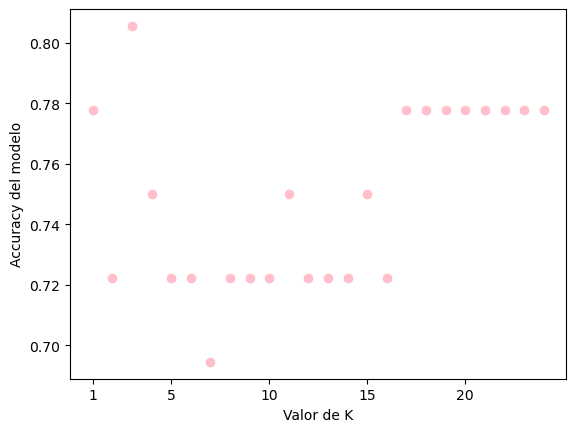

In [20]:
k_range = range(1, 25)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))
    
plt.figure()
plt.xlabel("Valor de K")
plt.ylabel("Accuracy del modelo")
plt.scatter(k_range, scores, color='pink')
plt.xticks([1, 5, 10, 15, 20])
plt.show

As it can be seen, an optimal value of K ranges around 3. The new value of K is applied.

In [21]:
knn = KNeighborsClassifier(n_neighbors = 3)

In [22]:
knn.fit(X_train, y_train)  #realizo nuevamente el entrenamiento

KNeighborsClassifier(n_neighbors=3)

In [23]:
knn.score(X_test, y_test)

0.8055555555555556

The accuracy of KNN with a value of K=3 for the original dataset is 80%

### 1) Exercise with KNN (classification)

#### 1.B) Dataset with scaled data

The scaling process helps improve the performance and interpretability of models and makes it easier to work with data when features have different scales or units.

### Step 1: import libraries

The necessary libraries are attached

In [24]:
from sklearn.preprocessing import StandardScaler

### Step 2: Scaler Initialization

In [25]:
# Inicialización del escalador
std_scaler = StandardScaler()
# Ajuste: cálculo de la media y la desviación estándard de los features
std_scaler.fit(X)
# Escalado de los features: X -> X_scaled = (X - media(X))/std(X)
X_scaled = std_scaler.transform(X)

In [26]:
X_scaled.mean(axis=0)

array([ 7.84141790e-15,  2.44498554e-16, -4.05917497e-15, -7.11041712e-17,
       -2.49488320e-17, -1.95536471e-16,  9.44313292e-16, -4.17892936e-16,
       -1.54059038e-15, -4.12903170e-16,  1.39838203e-15,  2.12688793e-15,
       -6.98567296e-17])

The mean variable contains the mean value of each feature in the scaled data set. For example, for each characteristic like alcohol, malic_acid, etc. this returns the average value. The average value of each feature is approximately 0.0. The data is all centered around 0 to ensure that its features have a similar scale and mean.

In [27]:
X_scaled.std(axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

Scaled features have standard deviation = 1. This means that the variance of the data in each feature is equal to 1.

### Step 3: The data is divided into training and testing sets

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y.values, test_size=0.2, random_state=42, shuffle=True)

### Step 4: Fit the KNN model with the training data

In [29]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [30]:
knn_score = knn.score(X_test, y_test)
knn_score 

0.9444444444444444

### Conclusion:

For a K value of 5, the accuracy for the scaled dataset is 94%, therefore, compared to the original dataset with a K value of 5 of 72% accuracy, a higher level of accuracy has been obtained, even if we take K to its optimal value (3) in the original dataset. 

### Graph corresponding to the wine dataset with value K=5

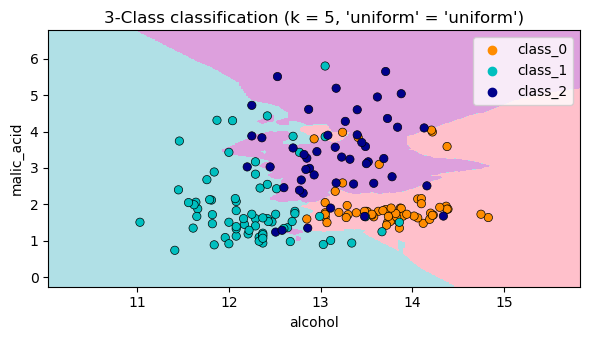

In [31]:
plt.rcParams["figure.figsize"] = [6.00, 3.50]
plt.rcParams["figure.autolayout"] = True

n_neighbors = 5
wine = datasets.load_wine()
X = wine.data[:, :2]
y = wine.target
h = .02

cmap_light = ListedColormap(['pink', 'powderblue', 'plum'])
cmap_bold = ['darkorange', 'c', 'darkblue']


clf = neighbors.KNeighborsClassifier(n_neighbors, weights='uniform')
clf.fit(X, y)

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure()

plt.contourf(xx, yy, Z, cmap=cmap_light)

sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=wine.target_names[y],
palette=cmap_bold, alpha=1.0, edgecolor="black")

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.title("3-Class classification (k = %i, 'uniform' = '%s')"
% (n_neighbors, 'uniform'))

plt.xlabel(wine.feature_names[0])
plt.ylabel(wine.feature_names[1])

plt.show()

The data fits within its corresponding class with a few exceptions.

It could be considered that a case of overfitting does not necessarily occur.

### 2) Decision tree model

A decision tree is a popular (supervised) machine learning algorithm used for both classification and regression tasks. The model has the structure of a tree, the root would represent the first question, each node (leaves) of the tree represents a category, answer or a test on a specific characteristic, and each branch represents the result of the test.

#### 2.A) Dataset with original data

### Step 1: Import necessary libraries

In [32]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

### Step 2: Import the original database

In [33]:
wine = load_wine()
X = wine.data  # asignamos X como features, características
y = wine.target  # asignamos y como target, etiquetas

### Step 3: The data is divided into training and testing sets

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Step 4: The decision tree model is created and trained with a maximum depth of 3

In [35]:
clf = DecisionTreeClassifier(max_depth=3, random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

### Step 5: Predictions are made with previously unseen data

In [36]:
y_pred = clf.predict(X_test)

In [37]:
# The accuracy of the model is evaluated

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9444444444444444


The precision for the original dataset is 94%

### Step 6: the tree graph is made with a depth of 3

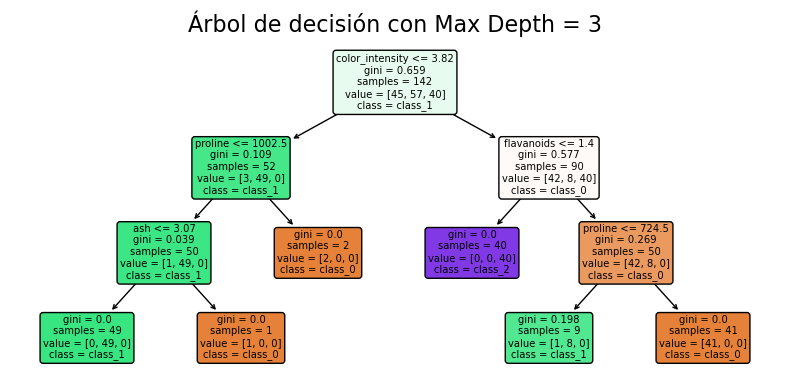

In [38]:
plt.figure(figsize=(8, 4))
plot_tree(clf, filled=True, feature_names=wine.feature_names, class_names=wine.target_names, rounded=True)

plt.title("Árbol de decisión con Max Depth = 3", fontsize=16)  
plt.rcParams['text.color'] = 'black'  
plt.gca().set_facecolor('#FFFFFF')  
plt.xticks(color='black')  
plt.yticks(color='black')  

plt.show()

### 2) Decision tree
#### 2.B) With normalized data

### Step 1: Import necessary libraries

In [39]:
from sklearn import preprocessing

### Step 2: normalize the features using the preprocessing.normalize method

In [40]:
X_normalized = preprocessing.normalize(X)

### Step 3: normalized data is divided into training and testing sets

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

### Step 4: The model is created and trained with a depth value of 3

In [42]:
clf = DecisionTreeClassifier(max_depth=3, random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

### Step 5: Make predictions

In [43]:
y_pred = clf.predict(X_test)

In [44]:
# The model is evaluated with normalized data

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9166666666666666


### Conclusion:

When comparing the performance of the decision tree model on the wine database, its performance is better on the original database (94%) than on the normalized database (91%) using the normalization technique.

### Section: Unsupervised Learning

### 3) PCA exercise with normalized data

PCA (principal component analysis) is applied for very high-dimensional spaces, Euclidean distances tend to be inflated (this is an example of the so-called "curse of dimensionality"). Running a dimensionality reduction algorithm such as principal component analysis (PCA) can alleviate this problem and speed up calculations. In this context, PCA is applied to the normalized dataset specifying that the dimensionality is intended to be reduced to 2 principal components using (n_components=2).

### Step 1: the necessary library is applied

In [45]:
from sklearn.decomposition import PCA

### Step 2: PCA is applied to reduce dimensionality to 2

In [46]:
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X_normalized)

### Step 3: Plot the PCA-reduced data

The labels associated with the classes of the variable are reviewed and the graphs are displayed with different colors.

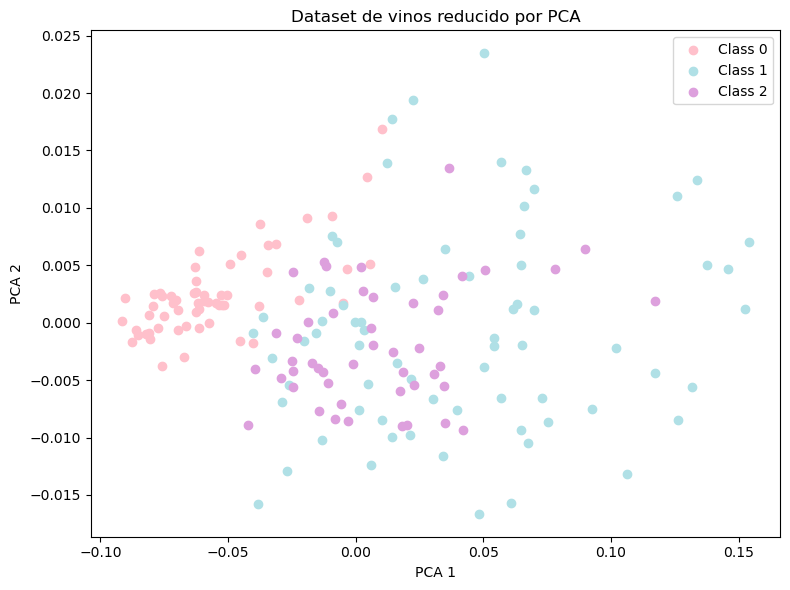

In [47]:
plt.figure(figsize=(8, 6))

# Defino colores para las etiquetas 

label_colors = {
    0: 'pink',
    1: 'powderblue',
    2: 'plum'
}

for label in set(y):
    indices = y == label
    plt.scatter(X_reduced[indices, 0], X_reduced[indices, 1], label=f"Class {label}", color=label_colors[label])

plt.title("Dataset de vinos reducido por PCA")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend()
plt.show()

### Conclusion:

Using this graph it is possible to identify the 3 classes of wines in two dimensions, it still remains for them to be grouped into clusters through KMeans as will be done in the following lines

### 4) KMeans algorithm on data transformed by PCA

### Step 1: Import libraries

In [48]:
from sklearn.cluster import KMeans

In [49]:
import warnings
warnings.filterwarnings("ignore")

### Step 2: K-Means clustering is applied with n_clusters=3

In [50]:
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(X_reduced)

KMeans(n_clusters=3, random_state=42)

### Step 3: A cluster is assigned for each data point

In [51]:
labels = kmeans.labels_

### Step 4: Plot the PCA-reduced data

Using the K-Means algorithm (KMeans) with n_clusters=3 groups data points based on their characteristics, which have already been reduced in 2-dimensional space by PCA.

Next, the data points are plotted and colored based on their assignments to each cluster. The group labels are: (Cluster 0, Cluster 1, Cluster 2) which, as this is unsupervised learning, have been recognized without using the original class labels of the variable y.

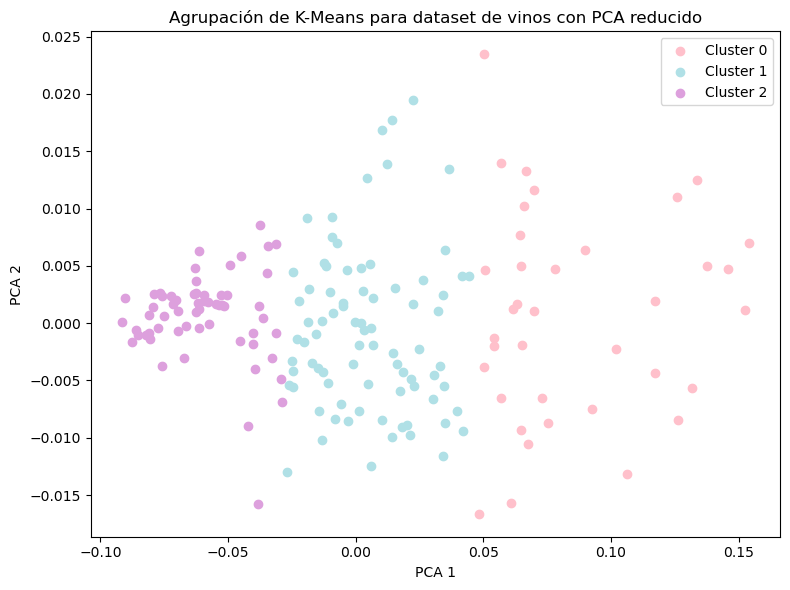

In [52]:
cluster_colors = ['pink', 'powderblue', 'plum'] 

plt.figure(figsize=(8, 6))

for cluster_label in range(n_clusters):
    indices = labels == cluster_label
    plt.scatter(X_reduced[indices, 0], X_reduced[indices, 1], label=f"Cluster {cluster_label}", color=cluster_colors[cluster_label])

plt.title("Agrupación de K-Means para dataset de vinos con PCA reducido")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")

custom_legend = [plt.Line2D([0], [0], marker='o', color='w', label=f'Cluster {i}', markersize=8, markerfacecolor=color) for i, color in enumerate(cluster_colors)]
plt.legend(handles=custom_legend)

plt.legend()
plt.show()

### Conclusion:

Now it can be identified that the features have been reduced to two dimensions where the 3 classes of wines are found and in addition the data have been grouped into 3 clusters through the KMeans algorithm.

### 5) K-means by mini-batches

MiniBatchKMeans is a variant of K-Means that uses subsets of the data to speed up the clustering process, this speeds up the calculation time for large data datasets.

### Step 1: Import libraries

In [53]:
from sklearn.cluster import MiniBatchKMeans

### Step 2: Mini-Batch K-Means clustering with 3 clusters is applied

In [54]:
n_clusters = 3
mini_batch_kmeans = MiniBatchKMeans(n_clusters=n_clusters, random_state=42)
mini_batch_kmeans.fit(X_reduced)

MiniBatchKMeans(n_clusters=3, random_state=42)

### Step 3: A cluster is assigned for each data point

In [55]:
labels = mini_batch_kmeans.labels_

### Step 4: Plot the PCA-reduced data using subsets of the Mini-Batch method

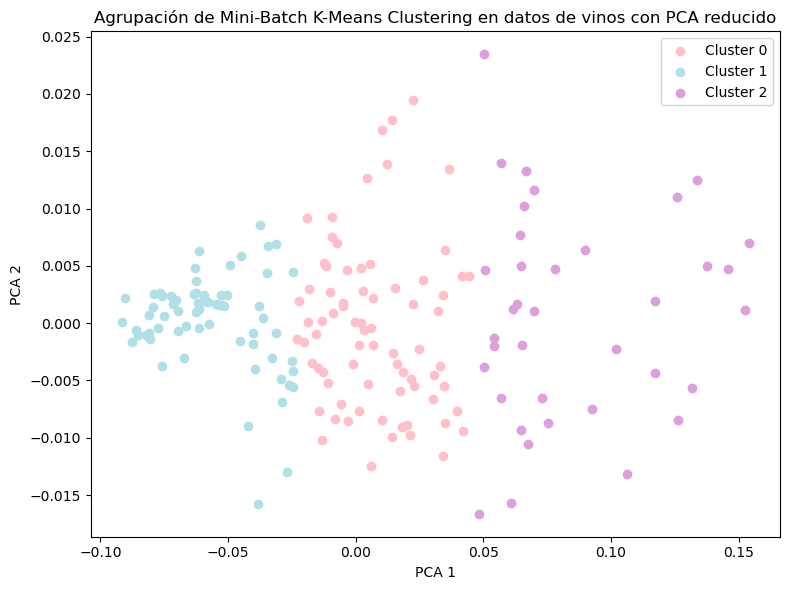

In [56]:
cluster_colors = ['pink', 'powderblue', 'plum'] 

plt.figure(figsize=(8, 6))

for cluster_label in range(n_clusters):
    indices = labels == cluster_label
    plt.scatter(X_reduced[indices, 0], X_reduced[indices, 1], label=f"Cluster {cluster_label}", color=cluster_colors[cluster_label])

plt.title("Agrupación de Mini-Batch K-Means Clustering en datos de vinos con PCA reducido")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")

custom_legend = [plt.Line2D([0], [0], marker='o', color='w', label=f'Cluster {i}', markersize=8, markerfacecolor=color) for i, color in enumerate(cluster_colors)]
plt.legend(handles=custom_legend)

plt.legend()
plt.show()

### Conclusion: 

In the last three points, the large dimensions of the features of the wine dataset have been reduced to 2 using the PCA method. The Mini-Batch K-Means grouping in relation to the grouping by the (normalized) data does not present differences but possibly the calculation time, and therefore, execution time using mini batches, is less.